Use a simplified U-Net architecture to colorize grayscale images by predicting the ab color channels in the LAB color space from the L channel.

In [4]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.color import rgb2lab, lab2rgb
from skimage.io import imread
from tensorflow import keras
from skimage.transform import resize

In [5]:
#Load and preprocess image
img_url="https://upload.wikimedia.org/wikipedia/commons/5/50/Vd-Orig.png"
image_path=tf.keras.utils.get_file("color_target.jpg",origin=img_url)
rgb=imread(image_path)/255.0
rgb=resize(rgb,(128,128))
lab=rgb2lab(rgb) #convert to lab space

X_l=lab[...,0:1]/100.0
y_ab=lab[...,1:]/128.0

X_l=X_l[np.newaxis,...]
y_ab=y_ab[np.newaxis,...]

In [9]:
#Define simplified U-Net model
inputs=keras.Input(shape=(128,128,1))
x=keras.layers.Conv2D(64,3,activation="relu",padding="same")(inputs)
x=keras.layers.MaxPooling2D()(x)
x=keras.layers.Conv2D(128,3,activation="relu",padding="same")(x)
x=keras.layers.UpSampling2D()(x)
x=keras.layers.Conv2D(64,3,activation="relu",padding="same")(x)
outputs=keras.layers.Conv2D(2,3,activation="tanh",padding="same")(x) #predict ab channel

In [10]:
model=keras.Model(inputs,outputs)
model.compile(optimizer="adam",loss="mse")

In [14]:
#Train on single image
model.fit(X_l,y_ab,epochs=1000,verbose=0)

In [15]:
pred_ab = model.predict(X_l)[0] #Predict a and b channel
lab_output = np.concatenate([X_l[0], pred_ab * 128.0], axis=-1) #Denormalizes ab channels and merges with L.
rgb_out = lab2rgb(lab_output) #Convert to RGB

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


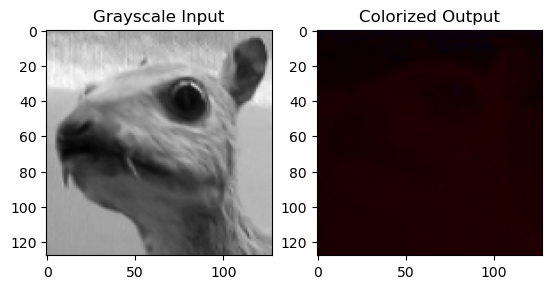

In [16]:
plt.subplot(1, 2, 1)
plt.imshow(X_l[0].squeeze(), cmap='gray')
plt.title("Grayscale Input")

plt.subplot(1, 2, 2)
plt.imshow(rgb_out)
plt.title("Colorized Output")
plt.show()
